# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

In [1]:
# 필요 라이브러리부터 설치할께요.
!pip install pandas seaborn

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm

---

# (실습준비) 데이터 불러오기부터

In [278]:
import pandas as pd

# 학습 데이터 로딩
air_21 = pd.read_csv("air_2021.csv", sep=',', index_col = 0, encoding = 'utf-8' )
air_22 = pd.read_csv("air_2022.csv", sep=',', index_col = 0, encoding = 'utf-8' )
weather_21 = pd.read_csv("weather_2021.csv", sep = ',', encoding='cp949')
weather_22 = pd.read_csv("weather_2022.csv", sep = ',', encoding='cp949')

---

# 1. 이상치/결측치 처리

#### [실습문제1] 미세먼지 데이터 결측치 처리
* 미세먼지 데이터의 결측치를 확인하고 결측치가 존재한다면 처리해주세요.


* 앞서 데이터 불러오기 및 분석 단계에서 확인한 불필요한 변수에 대해 제거 해 주세요. 

In [129]:
air_21.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2021100101,0.003,0.6,0.002,0.039,31.0,18.0,서울 종로구 종로35가길 19
1,서울 종로구,도시대기,111123,종로구,2021100102,0.003,0.6,0.002,0.035,27.0,16.0,서울 종로구 종로35가길 19
2,서울 종로구,도시대기,111123,종로구,2021100103,0.003,0.6,0.002,0.033,28.0,18.0,서울 종로구 종로35가길 19
3,서울 종로구,도시대기,111123,종로구,2021100104,0.003,0.6,0.002,0.030,26.0,16.0,서울 종로구 종로35가길 19
4,서울 종로구,도시대기,111123,종로구,2021100105,0.003,0.5,0.003,0.026,26.0,16.0,서울 종로구 종로35가길 19


In [279]:
columns = ['지역', '주소', '망', '측정소코드', '측정소명']
air_21 = air_21.drop(columns=columns, axis=1)
air_22 = air_22.drop(columns=columns, axis=1)

In [131]:
air_21.head()

,측정일시,SO2,CO,O3,NO2,PM10,PM25
0,2021100101,0.003,0.6,0.002,0.039,31.0,18.0
1,2021100102,0.003,0.6,0.002,0.035,27.0,16.0
2,2021100103,0.003,0.6,0.002,0.033,28.0,18.0
3,2021100104,0.003,0.6,0.002,0.030,26.0,16.0
4,2021100105,0.003,0.5,0.003,0.026,26.0,16.0


In [132]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
air_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   측정일시    8760 non-null   int64  
 1   SO2     8648 non-null   float64
 2   CO      8680 non-null   float64
 3   O3      8663 non-null   float64
 4   NO2     8680 non-null   float64
 5   PM10    8655 non-null   float64
 6   PM25    8663 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 547.5 KB


In [280]:
air_21 = air_21.interpolate()
air_22 = air_22.interpolate()

In [281]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
air_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2159
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   측정일시    2160 non-null   int64  
 1   SO2     2160 non-null   float64
 2   CO      2160 non-null   float64
 3   O3      2160 non-null   float64
 4   NO2     2160 non-null   float64
 5   PM10    2160 non-null   float64
 6   PM25    2160 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 135.0 KB


#### [실습문제2] 날씨 데이터 결측치 처리
* 날씨 데이터의 결측치를 확인하고 결측치가 존재한다면 처리해주세요.

* '강우량'을 어떻게 해야할까요?

In [135]:
weather_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             8759 non-null   int64  
 1   지점명            8759 non-null   object 
 2   일시             8759 non-null   object 
 3   기온(°C)         8759 non-null   float64
 4   기온 QC플래그       0 non-null      float64
 5   강수량(mm)        949 non-null    float64
 6   강수량 QC플래그      1763 non-null   float64
 7   풍속(m/s)        8757 non-null   float64
 8   풍속 QC플래그       2 non-null      float64
 9   풍향(16방위)       8757 non-null   float64
 10  풍향 QC플래그       2 non-null      float64
 11  습도(%)          8759 non-null   int64  
 12  습도 QC플래그       0 non-null      float64
 13  증기압(hPa)       8759 non-null   float64
 14  이슬점온도(°C)      8759 non-null   float64
 15  현지기압(hPa)      8759 non-null   float64
 16  현지기압 QC플래그     0 non-null      float64
 17  해면기압(hPa)      8759 non-null   float64
 18  해면기압 QC플

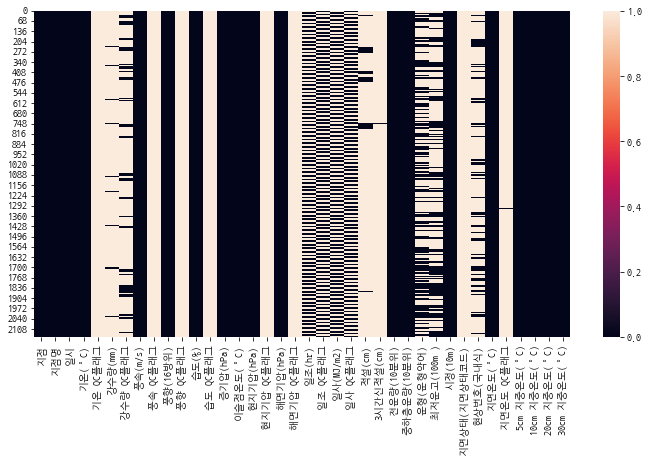

In [282]:
plt.figure(figsize = (12,6))
sns.heatmap(weather_22.isna())
plt.show()

In [283]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
columns = ['지점', '지점명', '기온 QC플래그', '습도 QC플래그', '현지기압 QC플래그', '일사 QC플래그', '강수량 QC플래그', '일조 QC플래그', '지면온도 QC플래그', '해면기압 QC플래그', '풍속 QC플래그', '풍향 QC플래그', '지면상태(지면상태코드)', '3시간신적설(cm)']
weather_21 = weather_21.drop(columns=columns, axis=1)
weather_22 = weather_22.drop(columns=columns, axis=1)

In [138]:
weather_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   일시             8759 non-null   object 
 1   기온(°C)         8759 non-null   float64
 2   강수량(mm)        949 non-null    float64
 3   풍속(m/s)        8757 non-null   float64
 4   풍향(16방위)       8757 non-null   float64
 5   습도(%)          8759 non-null   int64  
 6   증기압(hPa)       8759 non-null   float64
 7   이슬점온도(°C)      8759 non-null   float64
 8   현지기압(hPa)      8759 non-null   float64
 9   해면기압(hPa)      8759 non-null   float64
 10  일조(hr)         4791 non-null   float64
 11  일사(MJ/m2)      4791 non-null   float64
 12  적설(cm)         379 non-null    float64
 13  전운량(10분위)      8757 non-null   float64
 14  중하층운량(10분위)    8759 non-null   int64  
 15  운형(운형약어)       4947 non-null   object 
 16  최저운고(100m )    4547 non-null   float64
 17  시정(10m)        8759 non-null   int64  
 18  현상번호(국내식

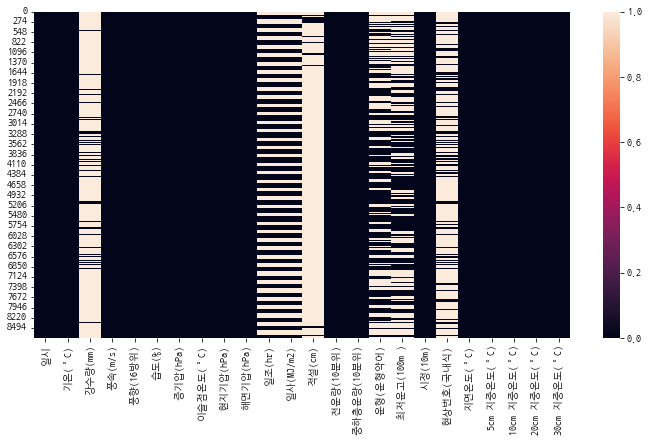

In [139]:
plt.figure(figsize = (12,6))
sns.heatmap(weather_21.isna())
plt.show()

In [284]:
feature = '강수량(mm)'
weather_21[feature].isna().sum()

7810

In [285]:
weather_21[feature] = weather_21[feature].fillna(0)
weather_22[feature] = weather_22[feature].fillna(0)

In [286]:
weather_22[feature].describe()

count    2160.000000
mean        0.052222
std         0.830099
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        32.200000
Name: 강수량(mm), dtype: float64

In [287]:
feature = '일조(hr)'
weather_21[feature].isna().sum()

3968

In [144]:
weather_21[feature].describe()

count    4791.000000
mean        0.458380
std         0.438788
min         0.000000
25%         0.000000
50%         0.400000
75%         1.000000
max         1.000000
Name: 일조(hr), dtype: float64

In [288]:
weather_21[feature] = weather_21[feature].fillna(0)
weather_22[feature] = weather_22[feature].fillna(0)

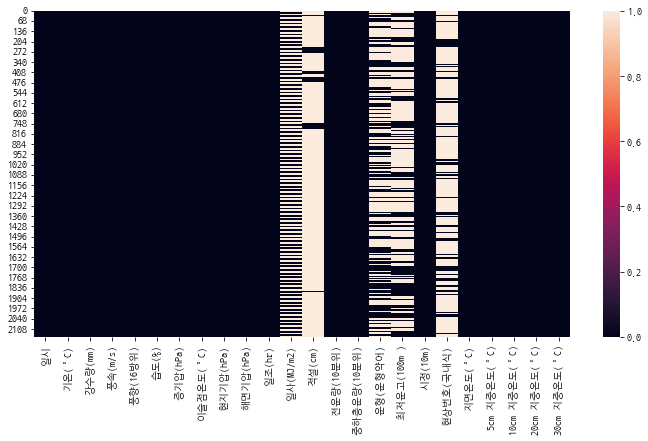

In [289]:
plt.figure(figsize = (12,6))
sns.heatmap(weather_22.isna())
plt.show()

In [290]:
feature = '일사(MJ/m2)'
weather_21[feature].isna().sum()

3968

In [291]:
weather_21[feature] = weather_21[feature].fillna(0)
weather_22[feature] = weather_22[feature].fillna(0)

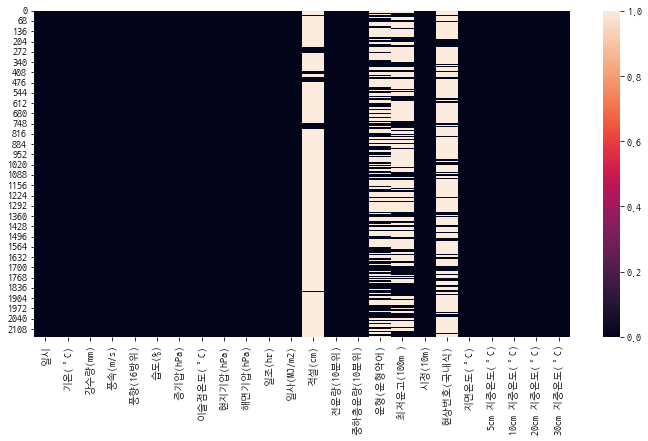

In [293]:
plt.figure(figsize = (12,6))
sns.heatmap(weather_22.isna())
plt.show()

In [294]:
feature = '적설(cm)'
weather_21[feature].isna().sum()

8380

In [295]:
weather_21[feature] = weather_21[feature].fillna(0)
weather_22[feature] = weather_22[feature].fillna(0)

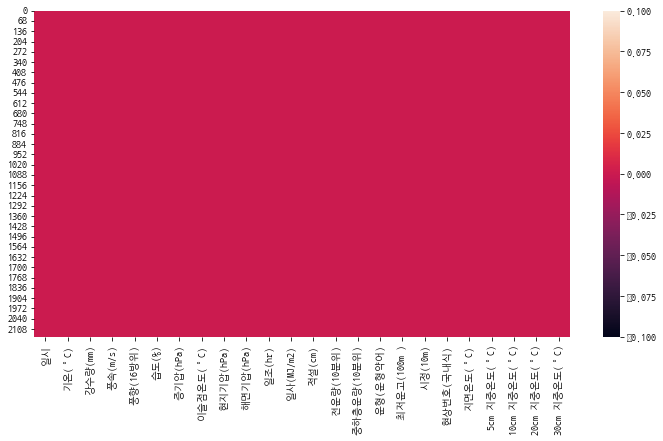

In [307]:
plt.figure(figsize = (12,6))
sns.heatmap(weather_22.isna())
plt.show()

In [297]:
feature = '운형(운형약어)' 
weather_21[feature].isna().sum()

3812

In [157]:
weather_21[feature].value_counts()

Sc          1409
Ci          1056
ScAs         561
StNs         423
ScCi         389
Ac           210
AcCi         176
ScAc         149
St           121
As            69
CuSc          63
Cs            53
AcCs          41
ScCs          39
ScAcCi        37
CbStNs        26
Cc            17
Cu            17
CuCi          12
CuScCi        11
ScCc          10
CuScAs         7
CuScCs         6
ScAcCs         5
CcCi           3
CuScCc         3
CuScAcCi       3
CuAc           3
StAs           3
CuScNs         3
AcCc           3
CuScAc         3
CbCu           2
CsCi           2
CuAs           1
CbSc           1
AcCcCi         1
ScAsCi         1
StAsCi         1
CuCcCi         1
CuAcCc         1
ScCcCi         1
CbScCs         1
CuScCcCi       1
CbScNs         1
CbScAs         1
Name: 운형(운형약어), dtype: int64

In [298]:
weather_21[feature] = weather_21[feature].fillna('NoCloud')
weather_22[feature] = weather_22[feature].fillna('NoCloud')

In [159]:
weather_21[feature].value_counts()

NoCloud     3812
Sc          1409
Ci          1056
ScAs         561
StNs         423
ScCi         389
Ac           210
AcCi         176
ScAc         149
St           121
As            69
CuSc          63
Cs            53
AcCs          41
ScCs          39
ScAcCi        37
CbStNs        26
Cc            17
Cu            17
CuCi          12
CuScCi        11
ScCc          10
CuScAs         7
CuScCs         6
ScAcCs         5
CcCi           3
CuScCc         3
CuScAcCi       3
CuScAc         3
StAs           3
CuScNs         3
AcCc           3
CuAc           3
CbCu           2
CsCi           2
CuAs           1
CbSc           1
AcCcCi         1
ScAsCi         1
StAsCi         1
CuCcCi         1
CuAcCc         1
ScCcCi         1
CbScCs         1
CuScCcCi       1
CbScNs         1
CbScAs         1
Name: 운형(운형약어), dtype: int64

In [299]:
feature = '최저운고(100m )'
weather_21[feature].isna().sum()

4212

In [161]:
weather_21[feature].describe()

count    4547.000000
mean       15.161425
std        13.537921
min         1.000000
25%         7.000000
50%        10.000000
75%        16.000000
max        76.000000
Name: 최저운고(100m ), dtype: float64

In [162]:
weather_21[feature].value_counts()

10.0    772
8.0     297
7.0     274
6.0     252
5.0     226
       ... 
71.0      1
69.0      1
60.0      1
76.0      1
74.0      1
Name: 최저운고(100m ), Length: 76, dtype: int64

In [300]:
weather_21[feature] = weather_21[feature].fillna(200)
weather_22[feature] = weather_22[feature].fillna(200)

In [164]:
'운형(운형약어)' 

'운형(운형약어)'

In [301]:
feature = '현상번호(국내식)'
weather_21[feature].isna().sum()

6634

In [302]:
weather_21[feature] = weather_21[feature].fillna(0)
weather_22[feature] = weather_22[feature].fillna(0)

C:\Users\Wslee\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Wslee\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


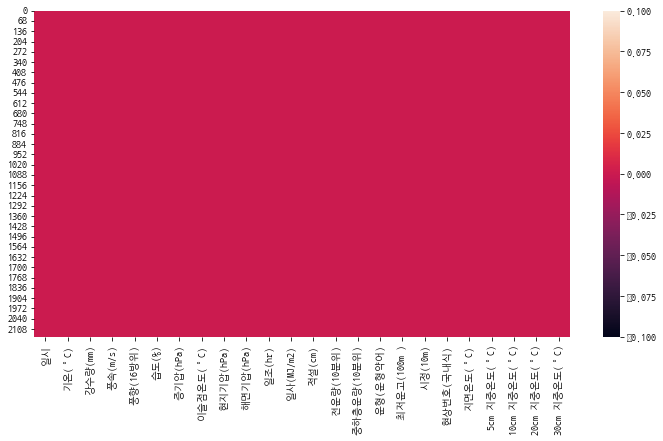

In [303]:
plt.figure(figsize = (12,6))
sns.heatmap(weather_22.isna())
plt.show()

In [308]:
weather_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   일시             2160 non-null   object 
 1   기온(°C)         2160 non-null   float64
 2   강수량(mm)        2160 non-null   float64
 3   풍속(m/s)        2160 non-null   float64
 4   풍향(16방위)       2160 non-null   int64  
 5   습도(%)          2160 non-null   int64  
 6   증기압(hPa)       2160 non-null   float64
 7   이슬점온도(°C)      2160 non-null   float64
 8   현지기압(hPa)      2160 non-null   float64
 9   해면기압(hPa)      2160 non-null   float64
 10  일조(hr)         2160 non-null   float64
 11  일사(MJ/m2)      2160 non-null   float64
 12  적설(cm)         2160 non-null   float64
 13  전운량(10분위)      2160 non-null   int64  
 14  중하층운량(10분위)    2160 non-null   int64  
 15  운형(운형약어)       2160 non-null   object 
 16  최저운고(100m )    2160 non-null   float64
 17  시정(10m)        2160 non-null   int64  
 18  현상번호(국내식

In [309]:
weather_22.head()

,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),...,중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),현상번호(국내식),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,2022-01-01 00:00,-8.5,0.0,1.9,320,41,1.3,-19.4,1021.9,1033.2,...,0,NoCloud,200.0,2000,0.0,-7.0,-1.0,-1.0,-0.2,1.0
1,2022-01-01 01:00,-9.2,0.0,1.8,270,42,1.3,-19.7,1022.2,1033.6,...,0,NoCloud,200.0,2000,0.0,-7.2,-1.1,-1.1,-0.2,1.0
2,2022-01-01 02:00,-9.5,0.0,1.2,270,43,1.3,-19.7,1022.3,1033.7,...,0,NoCloud,200.0,2000,0.0,-7.5,-1.3,-1.2,-0.2,1.0
3,2022-01-01 03:00,-9.3,0.0,1.4,290,46,1.4,-18.8,1022.6,1034.0,...,0,NoCloud,200.0,2000,0.0,-7.6,-1.4,-1.2,-0.2,1.0
4,2022-01-01 04:00,-9.6,0.0,1.7,340,48,1.4,-18.5,1021.9,1033.3,...,0,NoCloud,200.0,2000,0.0,-7.6,-1.4,-1.3,-0.3,1.0


#### [실습문제3] air_21, air_22 의 '측정일시'를 활용하여 'time'변수 생성하기


* air_21, air_22 의 '측정일시'를 활용하여 'time'변수 생성


* time 변수를 datatime으로 데이터 타입 변경하기

In [224]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
from datetime import datetime, date

air_21['time']





,측정일시,SO2,CO,O3,NO2,PM10,PM25,time
0,2021100101,0.003,0.6,0.002,0.039,31.0,18.0,0 2021100101\n1 2021100102\n2 ...
1,2021100102,0.003,0.6,0.002,0.035,27.0,16.0,0 2021100101\n1 2021100102\n2 ...
2,2021100103,0.003,0.6,0.002,0.033,28.0,18.0,0 2021100101\n1 2021100102\n2 ...
3,2021100104,0.003,0.6,0.002,0.030,26.0,16.0,0 2021100101\n1 2021100102\n2 ...
4,2021100105,0.003,0.5,0.003,0.026,26.0,16.0,0 2021100101\n1 2021100102\n2 ...
...,...,...,...,...,...,...,...,...
8755,2021093020,0.003,0.7,0.020,0.036,35.0,24.0,0 2021100101\n1 2021100102\n2 ...
8756,2021093021,0.003,0.6,0.016,0.035,34.0,21.0,0 2021100101\n1 2021100102\n2 ...
8757,2021093022,0.003,0.6,0.012,0.036,30.0,19.0,0 2021100101\n1 2021100102\n2 ...
8758,2021093023,0.003,0.6,0.004,0.042,33.0,19.0,0 2021100101\n1 2021100102\n2 ...


In [326]:
tmp = []
for i in range(8760):
    tmp.append(datetime(int(str(air_21['측정일시'][i])[0:4]), int(str(air_21['측정일시'][i])[4:6]), int(str(air_21['측정일시'][i])[6:8]), int(str(air_21['측정일시'][i])[8:])-1))
air_21['time'] = tmp

In [311]:
tmp = []
for i in range(2160):
    tmp.append(datetime(int(str(air_22['측정일시'][i])[0:4]), int(str(air_22['측정일시'][i])[4:6]), int(str(air_22['측정일시'][i])[6:8]), int(str(air_22['측정일시'][i])[8:])-1))
air_22['time'] = tmp

In [327]:
air_21 = air_21.sort_values('time')
air_21 = air_21.reset_index(drop=True)

In [312]:
air_22 = air_22.sort_values('time')
air_22 = air_22.reset_index(drop=True)

In [251]:
air_21

,측정일시,SO2,CO,O3,NO2,PM10,PM25,time
0,2021010101,0.002,0.5,0.022,0.016,24.0,14.0,2021-01-01 00:00:00
1,2021010102,0.002,0.6,0.018,0.020,25.0,14.0,2021-01-01 01:00:00
2,2021010103,0.002,0.6,0.013,0.025,27.0,16.0,2021-01-01 02:00:00
3,2021010104,0.003,0.6,0.011,0.027,23.0,13.0,2021-01-01 03:00:00
4,2021010105,0.003,0.6,0.008,0.032,24.0,14.0,2021-01-01 04:00:00
...,...,...,...,...,...,...,...,...
8755,2021123120,0.003,0.4,0.025,0.020,26.0,8.0,2021-12-31 19:00:00
8756,2021123121,0.003,0.4,0.030,0.014,27.0,9.0,2021-12-31 20:00:00
8757,2021123122,0.003,0.4,0.033,0.011,20.0,8.0,2021-12-31 21:00:00
8758,2021123123,0.003,0.4,0.029,0.015,20.0,9.0,2021-12-31 22:00:00


In [313]:
air_22

,측정일시,SO2,CO,O3,NO2,PM10,PM25,time
0,2022010101,0.003,0.4,0.026,0.016,23.0,12.0,2022-01-01 00:00:00
1,2022010102,0.003,0.4,0.022,0.020,20.0,9.0,2022-01-01 01:00:00
2,2022010103,0.003,0.5,0.014,0.028,20.0,9.0,2022-01-01 02:00:00
3,2022010104,0.003,0.5,0.016,0.027,19.0,10.0,2022-01-01 03:00:00
4,2022010105,0.003,0.5,0.005,0.040,24.0,11.0,2022-01-01 04:00:00
...,...,...,...,...,...,...,...,...
2155,2022033120,0.002,0.4,0.036,0.017,11.0,8.0,2022-03-31 19:00:00
2156,2022033121,0.002,0.4,0.032,0.018,10.0,7.0,2022-03-31 20:00:00
2157,2022033122,0.003,0.3,0.038,0.013,11.0,5.0,2022-03-31 21:00:00
2158,2022033123,0.003,0.3,0.036,0.015,11.0,5.0,2022-03-31 22:00:00


In [218]:
air_21.head()

,측정일시,SO2,CO,O3,NO2,PM10,PM25
0,2021100101,0.003,0.6,0.002,0.039,31.0,18.0
1,2021100102,0.003,0.6,0.002,0.035,27.0,16.0
2,2021100103,0.003,0.6,0.002,0.033,28.0,18.0
3,2021100104,0.003,0.6,0.002,0.030,26.0,16.0
4,2021100105,0.003,0.5,0.003,0.026,26.0,16.0


#### [실습문제4] weather_21, weather_22 의 '일시'를 활용하여 'time'변수 생성하기


* weather_21, weather_22 의 '측정일시'를 활용하여 'time'변수 생성


* time 변수를 datatime으로 데이터 타입 변경하기

In [207]:
datetime(21, 1, 1)

datetime.datetime(21, 1, 1, 0, 0)

In [189]:
air_21.tail(30)

,측정일시,SO2,CO,O3,NO2,PM10,PM25
8730,2021092919,0.003,0.4,0.016,0.017,11.0,8.0
8731,2021092920,0.003,0.5,0.014,0.018,15.0,9.0
8732,2021092921,0.003,0.5,0.006,0.024,18.0,13.0
8733,2021092922,0.003,0.7,0.005,0.025,15.0,9.0
8734,2021092923,0.003,0.5,0.007,0.021,14.0,8.0
8735,2021092924,0.003,0.5,0.004,0.021,11.0,6.0
8736,2021093001,0.003,0.4,0.004,0.019,13.0,6.0
8737,2021093002,0.003,0.4,0.005,0.018,13.0,7.0
8738,2021093003,0.003,0.4,0.006,0.015,14.0,11.0
8739,2021093004,0.003,0.4,0.006,0.013,15.0,10.0


In [328]:
tmp = []
for i in range(8759):
    tmp.append(datetime(int(str(weather_21['일시'][i])[0:4]), int(str(weather_21['일시'][i])[5:7]), int(str(weather_21['일시'][i])[8:10]), int(str(weather_21['일시'][i])[11:13])))
weather_21['time'] = tmp

In [315]:
tmp = []
for i in range(2160):
    tmp.append(datetime(int(str(weather_22['일시'][i])[0:4]), int(str(weather_22['일시'][i])[5:7]), int(str(weather_22['일시'][i])[8:10]), int(str(weather_22['일시'][i])[11:13])))
weather_22['time'] = tmp

In [255]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
weather_21.head(30)
print(int(str(air_21['측정일시'][i])[0:4]), int(str(air_21['측정일시'][i])[4:6]), int(str(air_21['측정일시'][i])[6:8]), int(str(air_21['측정일시'][i])[8:])-1)



2021 12 31 23


In [272]:
weather_21

,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),...,중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),현상번호(국내식),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,2021-01-01 01:00,-8.7,0.0,2.4,270.0,68,2.2,-13.5,1016.4,1027.7,...,0,NoCloud,200.0,2000,0.0,-6.9,-1.0,-0.8,0.3,1.6
1,2021-01-01 02:00,-9.1,0.0,1.6,270.0,69,2.1,-13.7,1016.2,1027.5,...,0,NoCloud,200.0,2000,0.0,-7.1,-1.1,-0.8,0.3,1.6
2,2021-01-01 03:00,-9.3,0.0,1.1,250.0,70,2.1,-13.7,1016.8,1028.1,...,0,NoCloud,200.0,2000,0.0,-7.3,-1.2,-0.9,0.3,1.6
3,2021-01-01 04:00,-9.3,0.0,0.3,0.0,71,2.2,-13.5,1016.2,1027.5,...,0,NoCloud,200.0,2000,0.0,-7.5,-1.3,-1.0,0.2,1.5
4,2021-01-01 05:00,-9.7,0.0,1.9,20.0,72,2.1,-13.8,1015.6,1026.9,...,0,NoCloud,200.0,2000,0.0,-7.6,-1.3,-1.0,0.2,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2021-12-31 19:00,-6.4,0.0,2.2,250.0,34,1.3,-19.7,1021.1,1032.3,...,0,NoCloud,200.0,2000,0.0,-4.5,-0.5,-0.7,-0.1,1.0
8755,2021-12-31 20:00,-6.3,0.0,4.1,320.0,35,1.3,-19.2,1021.2,1032.4,...,0,NoCloud,200.0,2000,0.0,-5.3,-0.6,-0.8,-0.1,1.0
8756,2021-12-31 21:00,-6.7,0.0,4.8,320.0,36,1.3,-19.3,1021.2,1032.4,...,0,NoCloud,200.0,2000,0.0,-5.7,-0.7,-0.8,-0.1,1.0
8757,2021-12-31 22:00,-7.5,0.0,3.0,320.0,37,1.3,-19.7,1021.8,1033.1,...,0,NoCloud,200.0,2000,0.0,-6.2,-0.8,-0.9,-0.2,1.0


---

# 2. 데이터 합치기
* 미세먼지 데이터와 날씨 데이터를 'time' 기준으로 합쳐보겠습니다

air_21#### [실습문제5] 데이터 합치기
* 'df_21','df_22'에 21년도와 22년도의 미세먼지, 날씨 데이터를 합쳐 넣도록 하겠습니다.

In [338]:
# 아래에 실습코드를 작성하고 결과를 확인합니다
df_21 = pd.merge(air_21, weather_21, left_on='time', right_on='time', how='inner')

In [339]:
df_22 = pd.merge(air_22, weather_22, left_on='time', right_on='time', how='inner')

In [340]:
df_21 = df_21.drop(['측정일시', '일시'], axis=1)
df_22 = df_22.drop(['측정일시', '일시'], axis=1)

In [335]:
df_21 = pd.get_dummies(df_21, columns=['운형(운형약어)'], drop_first=True)
df_22 = pd.get_dummies(df_22, columns=['운형(운형약어)'], drop_first=True)

In [346]:
df_21

,SO2,CO,O3,NO2,PM10,PM25,time,기온(°C),강수량(mm),풍속(m/s),...,중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),현상번호(국내식),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,0.002,0.6,0.018,0.020,25.0,14.0,2021-01-01 01:00:00,-8.7,0.0,2.4,...,0,NoCloud,200.0,2000,0.0,-6.9,-1.0,-0.8,0.3,1.6
1,0.002,0.6,0.013,0.025,27.0,16.0,2021-01-01 02:00:00,-9.1,0.0,1.6,...,0,NoCloud,200.0,2000,0.0,-7.1,-1.1,-0.8,0.3,1.6
2,0.003,0.6,0.011,0.027,23.0,13.0,2021-01-01 03:00:00,-9.3,0.0,1.1,...,0,NoCloud,200.0,2000,0.0,-7.3,-1.2,-0.9,0.3,1.6
3,0.003,0.6,0.008,0.032,24.0,14.0,2021-01-01 04:00:00,-9.3,0.0,0.3,...,0,NoCloud,200.0,2000,0.0,-7.5,-1.3,-1.0,0.2,1.5
4,0.002,0.7,0.003,0.037,26.0,16.0,2021-01-01 05:00:00,-9.7,0.0,1.9,...,0,NoCloud,200.0,2000,0.0,-7.6,-1.3,-1.0,0.2,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,0.003,0.4,0.025,0.020,26.0,8.0,2021-12-31 19:00:00,-6.4,0.0,2.2,...,0,NoCloud,200.0,2000,0.0,-4.5,-0.5,-0.7,-0.1,1.0
8755,0.003,0.4,0.030,0.014,27.0,9.0,2021-12-31 20:00:00,-6.3,0.0,4.1,...,0,NoCloud,200.0,2000,0.0,-5.3,-0.6,-0.8,-0.1,1.0
8756,0.003,0.4,0.033,0.011,20.0,8.0,2021-12-31 21:00:00,-6.7,0.0,4.8,...,0,NoCloud,200.0,2000,0.0,-5.7,-0.7,-0.8,-0.1,1.0
8757,0.003,0.4,0.029,0.015,20.0,9.0,2021-12-31 22:00:00,-7.5,0.0,3.0,...,0,NoCloud,200.0,2000,0.0,-6.2,-0.8,-0.9,-0.2,1.0


In [359]:
df_22

,SO2,CO,O3,NO2,PM10,PM25,time,기온(°C),강수량(mm),풍속(m/s),...,중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),현상번호(국내식),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,0.003,0.4,0.026,0.016,23.0,12.0,2022-01-01 00:00:00,-8.5,0.0,1.9,...,0,NoCloud,200.0,2000,0.0,-7.0,-1.0,-1.0,-0.2,1.0
1,0.003,0.4,0.022,0.020,20.0,9.0,2022-01-01 01:00:00,-9.2,0.0,1.8,...,0,NoCloud,200.0,2000,0.0,-7.2,-1.1,-1.1,-0.2,1.0
2,0.003,0.5,0.014,0.028,20.0,9.0,2022-01-01 02:00:00,-9.5,0.0,1.2,...,0,NoCloud,200.0,2000,0.0,-7.5,-1.3,-1.2,-0.2,1.0
3,0.003,0.5,0.016,0.027,19.0,10.0,2022-01-01 03:00:00,-9.3,0.0,1.4,...,0,NoCloud,200.0,2000,0.0,-7.6,-1.4,-1.2,-0.2,1.0
4,0.003,0.5,0.005,0.040,24.0,11.0,2022-01-01 04:00:00,-9.6,0.0,1.7,...,0,NoCloud,200.0,2000,0.0,-7.6,-1.4,-1.3,-0.3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,0.002,0.4,0.036,0.017,11.0,8.0,2022-03-31 19:00:00,12.3,0.0,2.9,...,1,NoCloud,9.0,2000,0.0,10.0,12.6,11.8,11.0,10.2
2156,0.002,0.4,0.032,0.018,10.0,7.0,2022-03-31 20:00:00,11.6,0.0,2.7,...,0,NoCloud,200.0,2000,0.0,8.9,12.2,11.6,11.0,10.3
2157,0.003,0.3,0.038,0.013,11.0,5.0,2022-03-31 21:00:00,10.5,0.0,3.5,...,1,Sc,10.0,2000,0.0,7.8,11.8,11.4,11.0,10.4
2158,0.003,0.3,0.036,0.015,11.0,5.0,2022-03-31 22:00:00,9.3,0.0,1.9,...,3,NoCloud,10.0,2000,0.0,7.3,11.4,11.1,10.9,10.5


In [365]:
new_df = pd.concat([df_21, df_22], axis=0)

In [366]:
new_df.columns

Index(['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', 'time', '기온(°C)', '강수량(mm)',
       '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)',
       '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '적설(cm)', '전운량(10분위)',
       '중하층운량(10분위)', '운형(운형약어)', '최저운고(100m )', '시정(10m)', '현상번호(국내식)',
       '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)',
       '30cm 지중온도(°C)'],
      dtype='object')

In [367]:
new_df = pd.get_dummies(new_df, columns=['풍향(16방위)', '전운량(10분위)', '중하층운량(10분위)', '운형(운형약어)'], drop_first=True)

In [368]:
new_df_21 = new_df.iloc[:8759, :]

In [369]:
new_df_22 = new_df.iloc[8759:, :]

In [337]:
df_21

,SO2,CO,O3,NO2,PM10,PM25,time,기온(°C),강수량(mm),풍속(m/s),...,운형(운형약어)_ScAs,운형(운형약어)_ScAsCi,운형(운형약어)_ScCc,운형(운형약어)_ScCcCi,운형(운형약어)_ScCi,운형(운형약어)_ScCs,운형(운형약어)_St,운형(운형약어)_StAs,운형(운형약어)_StAsCi,운형(운형약어)_StNs
0,0.002,0.6,0.018,0.020,25.0,14.0,2021-01-01 01:00:00,-8.7,0.0,2.4,...,0,0,0,0,0,0,0,0,0,0
1,0.002,0.6,0.013,0.025,27.0,16.0,2021-01-01 02:00:00,-9.1,0.0,1.6,...,0,0,0,0,0,0,0,0,0,0
2,0.003,0.6,0.011,0.027,23.0,13.0,2021-01-01 03:00:00,-9.3,0.0,1.1,...,0,0,0,0,0,0,0,0,0,0
3,0.003,0.6,0.008,0.032,24.0,14.0,2021-01-01 04:00:00,-9.3,0.0,0.3,...,0,0,0,0,0,0,0,0,0,0
4,0.002,0.7,0.003,0.037,26.0,16.0,2021-01-01 05:00:00,-9.7,0.0,1.9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,0.003,0.4,0.025,0.020,26.0,8.0,2021-12-31 19:00:00,-6.4,0.0,2.2,...,0,0,0,0,0,0,0,0,0,0
8755,0.003,0.4,0.030,0.014,27.0,9.0,2021-12-31 20:00:00,-6.3,0.0,4.1,...,0,0,0,0,0,0,0,0,0,0
8756,0.003,0.4,0.033,0.011,20.0,8.0,2021-12-31 21:00:00,-6.7,0.0,4.8,...,0,0,0,0,0,0,0,0,0,0
8757,0.003,0.4,0.029,0.015,20.0,9.0,2021-12-31 22:00:00,-7.5,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0


In [363]:
new_df_22

,SO2,CO,O3,NO2,PM10,PM25,time,기온(°C),강수량(mm),풍속(m/s),...,운형(운형약어)_ScAs,운형(운형약어)_ScAsCi,운형(운형약어)_ScCc,운형(운형약어)_ScCcCi,운형(운형약어)_ScCi,운형(운형약어)_ScCs,운형(운형약어)_St,운형(운형약어)_StAs,운형(운형약어)_StAsCi,운형(운형약어)_StNs
0,0.003,0.4,0.026,0.016,23.0,12.0,2022-01-01 00:00:00,-8.5,0.0,1.9,...,0,0,0,0,0,0,0,0,0,0
1,0.003,0.4,0.022,0.020,20.0,9.0,2022-01-01 01:00:00,-9.2,0.0,1.8,...,0,0,0,0,0,0,0,0,0,0
2,0.003,0.5,0.014,0.028,20.0,9.0,2022-01-01 02:00:00,-9.5,0.0,1.2,...,0,0,0,0,0,0,0,0,0,0
3,0.003,0.5,0.016,0.027,19.0,10.0,2022-01-01 03:00:00,-9.3,0.0,1.4,...,0,0,0,0,0,0,0,0,0,0
4,0.003,0.5,0.005,0.040,24.0,11.0,2022-01-01 04:00:00,-9.6,0.0,1.7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,0.002,0.4,0.036,0.017,11.0,8.0,2022-03-31 19:00:00,12.3,0.0,2.9,...,0,0,0,0,0,0,0,0,0,0
2156,0.002,0.4,0.032,0.018,10.0,7.0,2022-03-31 20:00:00,11.6,0.0,2.7,...,0,0,0,0,0,0,0,0,0,0
2157,0.003,0.3,0.038,0.013,11.0,5.0,2022-03-31 21:00:00,10.5,0.0,3.5,...,0,0,0,0,0,0,0,0,0,0
2158,0.003,0.3,0.036,0.015,11.0,5.0,2022-03-31 22:00:00,9.3,0.0,1.9,...,0,0,0,0,0,0,0,0,0,0


In [370]:
new_df_21.to_csv("df2_21.csv")

In [371]:
new_df_22.to_csv("df2_22.csv")

#### [실습문제7] 미세먼지 농도 다음시점 데이터 생성

* t+1 시점 데이터 생성

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다




In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다



#### [실습문제7] 미세먼지 농도 다음시점 데이터 생성

* t+1 시점 데이터 생성

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다



---

# 3. train / test split

#### [실습문제7] 데이터셋 나누기 

* 데이터셋을 train(21년도 데이터), test(22년도 데이터)로 나눠 csv로 저장하도록 하겠습니다.


* train_x / train_y / test_x / test_y 로 나누세요.


* train_x.csv / train_y.csv / test_x.csv / test_y.csv 로 저장하세요.

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



---